In [ ]:
import time
import pandas as pd
import yfinance as yf

ticker = "AAPL"

for _ in range(5):
    data = yf.download(tickers=ticker, period="1d", interval="1m")
    
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    
    if not data.empty:
        latest_price = data['Close'].iloc[-1]
        print(f"{ticker} latest close: {latest_price}")
    else:
        print("⚠ No data fetched. Check ticker or API limits.")
    
    time.sleep(60)


C:\Users\nagal\AppData\Local\Temp\ipykernel_14220\2559276607.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=ticker, period="1d", interval="1m")
[*********************100%***********************]  1 of 1 completed


AAPL latest close: 229.64999389648438


C:\Users\nagal\AppData\Local\Temp\ipykernel_14220\2559276607.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=ticker, period="1d", interval="1m")
[*********************100%***********************]  1 of 1 completed


AAPL latest close: 229.64999389648438


In [18]:
!pip install ta
import ta

data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()

print(data.tail())


Price                           Close        High         Low        Open  \
Datetime                                                                    
2025-08-12 19:55:00+00:00  229.729996  229.910004  229.649994  229.860001   
2025-08-12 19:56:00+00:00  229.731598  229.789993  229.710007  229.729996   
2025-08-12 19:57:00+00:00  229.815002  229.850006  229.729996  229.735001   
2025-08-12 19:58:00+00:00  229.740005  229.820007  229.714996  229.815002   
2025-08-12 19:59:00+00:00  229.649994  229.770004  229.580002  229.744995   

Price                      Volume      SMA_10        RSI  
Datetime                                                  
2025-08-12 19:55:00+00:00  292352  229.548540  63.418149  
2025-08-12 19:56:00+00:00  204241  229.583699  63.475481  
2025-08-12 19:57:00+00:00  258425  229.638199  66.425380  
2025-08-12 19:58:00+00:00  313756  229.681200  61.607100  
2025-08-12 19:59:00+00:00  832910  229.701659  56.326200  



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


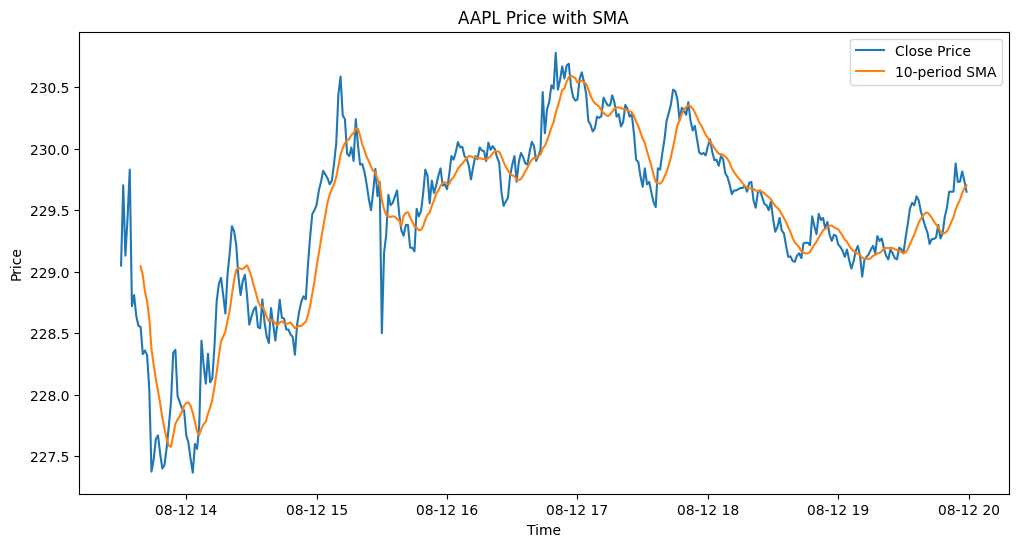

In [20]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['SMA_10'], label='10-period SMA')
plt.title(f"{ticker} Price with SMA")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [29]:

import websocket
import json

API_KEY = "C7TJZphlONKPjiGCkirJ00Y1fLykslYS"
symbol = "AAPL"

def on_message(ws, message):
    data = json.loads(message)
    print(data)

def on_open(ws):
    ws.send(json.dumps({"action":"auth","params":API_KEY}))
    ws.send(json.dumps({"action":"subscribe","params":f"T.{symbol}"}))

ws = websocket.WebSocketApp("wss://socket.polygon.io/stocks",
                            on_open=on_open, on_message=on_message)
ws.run_forever()


True

In [31]:
if data['RSI'].iloc[-1] > 70:
    print("⚠ Overbought! Possible sell signal.")
elif data['RSI'].iloc[-1] < 30:
    print("✅ Oversold! Possible buy signal.")
